In [9]:
import pandas as pd

In [10]:
train = pd.read_csv('./data/bike-sharing-demand/train.csv')
print(train.columns)
print(train.describe())
test = pd.read_csv('./data/bike-sharing-demand/test.csv')
sample = pd.read_csv('./data/bike-sharing-demand/sampleSubmission.csv')

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000 

### train, test 열 차이 확인

In [11]:
train_col = list(train.columns)
test_col = list(test.columns)
diff = set(train_col).difference(set(test_col))
print(diff)

{'count', 'registered', 'casual'}


### datetime 열을 datetime 자료형으로 변환 -> pd.to_datetime

In [12]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

### 열 이름 및 자료형, null 개수 확인

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### 자료 크기, 구조 확인

In [14]:
print(test.shape)
print(train.shape)

(6493, 9)
(10886, 12)


In [15]:
pm10data = pd.read_csv('./data/PM10_seoul.csv')
pm10data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    192 non-null    object 
 1   PM-10   192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [16]:
pm10data.head()

,date,PM-10
0,2022-12-08:24,22.0
1,2022-12-08:23,22.0
2,2022-12-08:22,25.0
3,2022-12-08:21,23.0
4,2022-12-08:20,20.0


<Axes: >

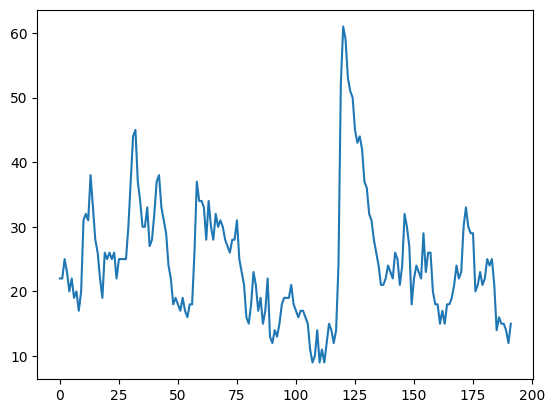

In [17]:
pm10data['PM-10'].plot()

In [18]:
type(pm10data['date'][0])

str

In [20]:
pm10data['time'] = pm10data['date'].str.split(':', expand=True).iloc[:, 1]

In [21]:
pm10data

,date,PM-10,time
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20
...,...,...,...
190,2022-12-01:02,12.0,02
191,2022-12-01:01,15.0,01
192,NaN,NaN,NaN
193,NaN,NaN,NaN


In [22]:
pm10data.dropna(inplace=True)

In [23]:
pm10data

,date,PM-10,time
0,2022-12-08:24,22.0,24
1,2022-12-08:23,22.0,23
2,2022-12-08:22,25.0,22
3,2022-12-08:21,23.0,21
4,2022-12-08:20,20.0,20
...,...,...,...
187,2022-12-01:05,15.0,05
188,2022-12-01:04,15.0,04
189,2022-12-01:03,14.0,03
190,2022-12-01:02,12.0,02


### 시계열 예측 모델링을 위해서, 1시간 전 ~ 4시간 전 관측치 이어 붙이기 
-> Shift 사용 (현재 데이터는 시간 내림차순이므로 전 데이터, 오름차순이면 shift(k)해야함)

In [26]:
for k in range(1, 5):
    pm10data['PM-10_' + str(k)] = pm10data['PM-10'].shift(-k)
print(pm10data)

              date  PM-10 time  PM-10_1  PM-10_2  PM-10_3  PM-10_4
0    2022-12-08:24   22.0   24     22.0     25.0     23.0     20.0
1    2022-12-08:23   22.0   23     25.0     23.0     20.0     22.0
2    2022-12-08:22   25.0   22     23.0     20.0     22.0     19.0
3    2022-12-08:21   23.0   21     20.0     22.0     19.0     20.0
4    2022-12-08:20   20.0   20     22.0     19.0     20.0     17.0
..             ...    ...  ...      ...      ...      ...      ...
187  2022-12-01:05   15.0   05     15.0     14.0     12.0     15.0
188  2022-12-01:04   15.0   04     14.0     12.0     15.0      NaN
189  2022-12-01:03   14.0   03     12.0     15.0      NaN      NaN
190  2022-12-01:02   12.0   02     15.0      NaN      NaN      NaN
191  2022-12-01:01   15.0   01      NaN      NaN      NaN      NaN

[192 rows x 7 columns]


In [31]:
pm10data.dropna(inplace=True)
pm10data.drop(['date','time'], axis=1, inplace=True)

KeyError: "['date', 'time'] not found in axis"

In [32]:
pm10data

,PM-10,PM-10_1,PM-10_2,PM-10_3,PM-10_4
0,22.0,22.0,25.0,23.0,20.0
1,22.0,25.0,23.0,20.0,22.0
2,25.0,23.0,20.0,22.0,19.0
3,23.0,20.0,22.0,19.0,20.0
4,20.0,22.0,19.0,20.0,17.0
...,...,...,...,...,...
183,25.0,21.0,14.0,16.0,15.0
184,21.0,14.0,16.0,15.0,15.0
185,14.0,16.0,15.0,15.0,14.0
186,16.0,15.0,15.0,14.0,12.0


In [35]:
x = pm10data.drop('PM-10', axis=1)
y = pm10data['PM-10']

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [36]:
print(model.predict(x))

[21.8200229  25.2622874  24.43406959 19.95871522 23.54559749 19.17874284
 20.52874809 17.48755273 17.79725775 29.17933917 31.96538743 28.58340937
 37.60662314 33.57739986 28.29972462 26.18872458 23.51793989 17.78370274
 26.24882843 24.59230162 26.53812319 24.31683565 27.02895127 21.58579666
 24.9900961  24.50793816 24.4527463  23.13867166 27.47429315 34.20353679
 41.14310721 44.70260566 36.03269911 33.54455649 29.95597765 28.21166227
 33.16237859 26.06612227 26.51883483 30.15721006 35.10271349 37.68922592
 32.85234555 30.75857231 30.13364848 24.47024688 23.62656294 18.75859986
 19.87790022 19.48529151 17.59629912 20.15172885 18.43149049 15.92254551
 18.12305781 17.36507376 22.75631619 36.23926775 33.19316039 32.29610452
 33.79767397 26.01266396 33.39305638 30.14544282 26.32609499 31.68828414
 29.18628561 30.47091488 29.91133992 27.62634084 27.04086895 25.01408192
 28.23410195 26.77908134 31.93648963 25.96484278 23.77463795 22.59865886
 17.11592896 15.88976622 17.92504583 23.51287745 23

In [4]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

In [52]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print(iris_data.shape)
print(iris_label.shape)

(150, 4)
(150,)


In [47]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'datasets',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils']

In [46]:
help(sklearn.preprocessing.MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearily
 |  scales them down into a fixed range, where the largest occuring data point
 |  corresponds to the maximum value and the smallest one 